In [1]:
import pandas as pd

In [14]:
site = "facebook.com"

In [15]:
pt_pd = pd.read_csv("./tmp_dict/%s/prolonged_traffic.txt" % site, sep = '\t', header = None)

In [5]:
import requests

In [6]:
get = requests.get("https://ipinfo.io/8.8.8.8/org?token=2c732d429c11a8").content.decode().strip()

In [7]:
pt_pd['org'] = pt_pd.apply(lambda x: requests.get("https://ipinfo.io/%s/org?token=2c732d429c11a8"%x[0]).content.decode().strip(), axis = 1)

In [16]:
pt_pd

,0,1
0,31.13.65.36,0.01
1,31.13.65.7,0.01
2,40.79.141.152,0.00
3,factor,50.00


In [6]:
import os

In [7]:
os.environ["mmpath"] = "/"

In [8]:
from subprocess import check_output

In [9]:
from collections import defaultdict

In [21]:
output_lst = defaultdict(list)

In [ ]:
for i in [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]:
    pt_pd[1] = pt_pd.apply(lambda x: i if "AS24429" in x['org'] else x[1], axis = 1)
    pt_pd[[0,1]].to_csv("./tmp_dict/%s/prolonged_traffic.txt" % site, header = None, index = None, sep = "\t")
    for _ in range(100):
        output_lst[i].append(check_output("python replay_all.py", shell = True))
    os.system("mv plTime/%s plTime/%s.%s" % (site,site,i))

In [10]:
plt_dict = {}
for i in [ 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]:
    plt_dict[i] = pd.read_csv("plTime/%s.%s" % (site,i), header = None, sep = '\t')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'facebook.com-NWT-PLT')

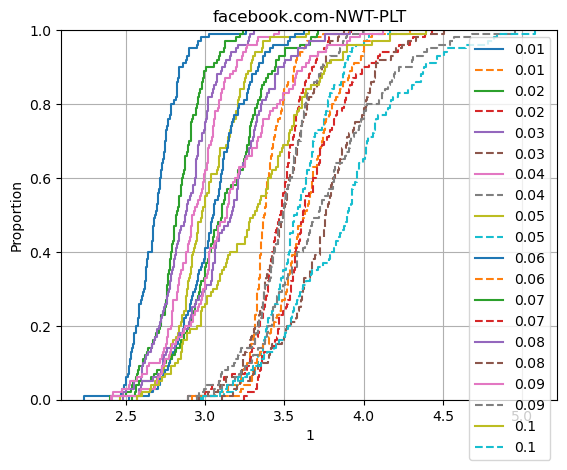

In [17]:
for each in plt_dict:
    sns.ecdfplot(plt_dict[each][plt_dict[each][0] == "NWT"][1], label = each.__str__())
    sns.ecdfplot(plt_dict[each][plt_dict[each][0] == "PLT"][1], label = each.__str__(), linestyle = "dashed")
plt.grid()
plt.legend()
plt.title("%s-NWT-PLT" % site)

In [52]:
len(output_lst)

11

In [53]:
connect_session_info_pic2 = output_lst

In [54]:
%store connect_session_info_pic2

Stored 'connect_session_info_pic2' (defaultdict)
